![example](images/director_shot.jpeg)

# Is It Time For A Sci-Fi Summer Adventure?

**Authors:** Doug, Carlos, Michael
***

## Overview

* What Better Way To Launch Microsoft's New Movie Other Than An Original Blockbuster Series?! We sift through the data to find out when is the best time to produce a film and what type of film people are currently enjoying. 


A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

We tried to see By creating our own series, we can create more loyal and dedicated fans.
But we must do it right. We start off by looking at the seasons to see where the best times to release 
a movie are and when is a bad time to have a big release. We also looked throuh the different genres to see
what films people are going to and paying for to narrow down their intrest. With this we can target our audiance 
to see where some opportunities may have been missed!

*Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.
***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

We went through different databases and combined from Box Office Mojo, IMBD, and The-Numbers to get a better general overview of not only peoples intreest but also what time of year they were seeing these movies. Our target variables were dates and genres corresponding to the gross income from foreign and domestic movies. 
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
#Import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import gzip
import csv
import numpy as np
import seaborn as sns
from matplotlib import style

In [2]:
# Load dataset 1 'bom.movie_gross' obtained from Box Office Mojo
df1 = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
df1 = df1.rename(columns = {'title':'movie'})

# Load dataset 4 'imbd.title.basics' obtained from IMDB
df4 = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
df4 = df4.rename(columns = {'primary_title':'movie'})

# Load dataset 11 'tn.movie_budgets' from The-Numbers
df11 = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')


## Data Preparation

* First we set all our gross values and our dates into integers so that we can work with them to calculate totals from the The-Numbers dataframe then we take only the movies with budget above 1 million dollars.  

In [3]:
# Strip '$' and ',' from the dataset and convert to int64 in order to manipulate the data
df11['worldwide_gross'] = df11['worldwide_gross'].str[1:]
df11['worldwide_gross'] = df11['worldwide_gross'].str.replace(',', '').astype(np.int64)
df11['domestic_gross'] = df11['domestic_gross'].str[1:]
df11['domestic_gross'] = df11['domestic_gross'].str.replace(',', '').astype(np.int64)
df11['production_budget'] = df11['production_budget'].str[1:]
df11['production_budget'] = df11['production_budget'].str.replace(',', '').astype(np.int64)

# Filter the data to our criteria
production = df11[df11.production_budget < 1000000].index
df11.drop(production, inplace=True)
worldwide = df11[df11.worldwide_gross < 1000000].index
df11.drop(worldwide, inplace=True)
df11.set_index('movie')

,id,release_date,production_budget,domestic_gross,worldwide_gross
movie,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279
Pirates of the Caribbean: On Stranger Tides,2,"May 20, 2011",410600000,241063875,1045663875
Dark Phoenix,3,"Jun 7, 2019",350000000,42762350,149762350
Avengers: Age of Ultron,4,"May 1, 2015",330600000,459005868,1403013963
Star Wars Ep. VIII: The Last Jedi,5,"Dec 15, 2017",317000000,620181382,1316721747
...,...,...,...,...,...
Fiza,59,"Sep 8, 2000",1000000,623791,1179462
Ajami,60,"Feb 3, 2010",1000000,621859,2721096
The Future,62,"Jul 29, 2011",1000000,568662,1239174


* Esstablishing a combined dataframe and droping values that are empty. 

In [4]:
# Merge the three dataframes together to get 'master' dataframe "BigFrame"
BigFrame = df11.merge(df1, on='movie').merge(df4, on='movie').drop\
                (columns=['tconst', 'original_title', 'start_year', 'id', 'domestic_gross_y'])
# Create 'month' column in order to manipute the data
BigFrame = BigFrame.drop_duplicates(subset='movie').set_index('movie')
BigFrame['month'] = BigFrame['release_date'].str[:3]
# Drop rows with missing values
BigFrame = BigFrame.dropna()
BigFrame.dropna(inplace=True)
# Final dataset has 967 rows
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].str.replace(',', '')
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].str.replace('.', '')
BigFrame['foreign_gross'] = BigFrame['foreign_gross'].astype(np.int64)
#Set the Foreign gross to an INT
BigFrame.year = BigFrame.year.astype(int)
#Set the Year as an INT

***

In [5]:
BigFrame.tail()

,release_date,production_budget,domestic_gross_x,worldwide_gross,studio,foreign_gross,year,runtime_minutes,genres,month
movie,,,,,,,,,,
Blue Valentine,"Dec 29, 2010",1000000,9737892,16566240,Wein.,2600000,2010,112.0,"Drama,Romance",Dec
Unfriended: Dark Web,"Jul 20, 2018",1000000,8866745,16434588,BH Tilt,6300000,2018,92.0,"Crime,Horror,Mystery",Jul
The Sessions,"Oct 19, 2012",1000000,6002451,11495204,FoxS,3100000,2012,95.0,"Biography,Comedy,Drama",Oct
Martha Marcy May Marlene,"Oct 21, 2011",1000000,2981038,5438911,FoxS,548000,2011,102.0,"Drama,Mystery,Thriller",Oct
Patti Cake$,"Aug 18, 2017",1000000,800148,1471090,FoxS,682000,2017,109.0,"Drama,Music",Aug


# Gross Amount Sorting
* Isolate the gross amounts according to their corresponding genres.

In [6]:
#Isolating each gross then setting it as the index to find the corresponding genres
ForeignF = BigFrame.set_index(keys='foreign_gross')
DomesticF = BigFrame.set_index(keys='domestic_gross_x')
ForeignF['genres'] = ForeignF['genres'].str.split(',')
DomesticF['genres'] = DomesticF['genres'].str.split(',')
ForeignF = ForeignF.drop(columns=['worldwide_gross'], axis=1).drop(columns='domestic_gross_x')
Domestic = DomesticF.drop(columns=['worldwide_gross'], axis=1).drop(columns='foreign_gross')
WorldGross = BigFrame.set_index(keys='worldwide_gross').drop(columns='domestic_gross_x').drop(columns='foreign_gross')

* We went with the median over the mean due to the outlires having adverse impact on our data set. 

In [7]:
#Create a function to extract the genres from Worldwide Gross and the corresponding gross amounts. 
def getgross(g):
    listi = []
    for k, v in WorldGross['genres'].items():
        if g in v:
            listi.append(k)
    return listi
waction = getgross('Action')
wcomedy = getgross('Comedy')
wadventure = getgross('Adventure')
wthriller = getgross('Thriller')
wcrime = getgross('Crime')
wromance = getgross('Romance')
whorror = getgross('Horror')
wscifi = getgross('Sci-Fi')
wbiography = getgross('Biography')
wmystery = getgross('Mystery')
wfamily = getgross('Family')
wmusic = getgross('Music')
wdocumentary = getgross('Documentary')


'''
Find the Median of all the genres
'''

mwaction = np.median(waction)
mwcomedy = np.median(wcomedy)
mwadventure = np.median(wadventure)
mwthriller = np.median(wthriller)
mwcrime = np.median(wcrime)
mwromance = np.median(wromance)
mwhorror = np.median(whorror)
mwscifi = np.median(wscifi)
mwbiography = np.median(wbiography)
mwmystery = np.median(wmystery)
mwfamily = np.median(wfamily)
mwmusic = np.median(wmusic)
mwdocumentary = np.median(wdocumentary)

In [8]:
#Set the medians to a list for graphing
WorldGrossMed = [mwcomedy, mwaction, mwadventure, mwthriller, mwcrime, mwromance, mwhorror, mwscifi, mwbiography, mwmystery, mwfamily, mwmusic, mwdocumentary]
WorldGrossMed = list(WorldGrossMed)

In [9]:
#Create a function to extract the genres from Foreign Gross and the corresponding gross amounts. 
def getgross(g):
    listi = []
    for k, v in ForeignF['genres'].items():
        if g in v:
            listi.append(k)
    return listi

#Create variables storing the total gross amount of each genre
faction = getgross('Action')
fcomedy = getgross('Comedy')
fadventure = getgross('Adventure')
fthriller = getgross('Thriller')
fcrime = getgross('Crime')
fromance = getgross('Romance')
fhorror = getgross('Horror')
fscifi = getgross('Sci-Fi')
fbiography = getgross('Biography')
fmystery = getgross('Mystery')
ffamily = getgross('Family')
fmusic = getgross('Music')
fdocumentary = getgross('Documentary')


'''
Find the Median of all the genres
'''

mfaction = np.median(faction)
mfcomedy = np.median(fcomedy)
mfadventure = np.median(fadventure)
mfthriller = np.median(fthriller)
mfcrime = np.median(fcrime)
mfromance = np.median(fromance)
mfhorror = np.median(fhorror)
mfscifi = np.median(fscifi)
mfbiography = np.median(fbiography)
mfmystery = np.median(fmystery)
mffamily = np.median(ffamily)
mfmusic = np.median(fmusic)
mfdocumentary = np.median(fdocumentary)

In [10]:
#Set the medians to a list for graphing
ForGrossMed = [mfcomedy, mfaction, mfadventure, mfthriller, mfcrime, mfromance, mfhorror, mfscifi, mfbiography, mfmystery, mffamily, mfmusic, mfdocumentary]
ForGrossMed = list(ForGrossMed)

In [11]:
#Create a function to extract the genres from Domestic Gross and the corresponding gross amounts. 
def getgross(g):
    listi = []
    for k, v in DomesticF['genres'].items():
        if g in v:
            listi.append(k)
    return listi
#Create variables storing the total gross amount of each genre
daction = getgross('Action')
dcomedy = getgross('Comedy')
dadventure = getgross('Adventure')
dthriller = getgross('Thriller')
dcrime = getgross('Crime')
dromance = getgross('Romance')
dhorror = getgross('Horror')
dscifi = getgross('Sci-Fi')
dbiography = getgross('Biography')
dmystery = getgross('Mystery')
dfamily = getgross('Family')
dmusic = getgross('Music')
ddocumentary = getgross('Documentary')


'''
Find the Median of all the genres
'''

mdaction = np.median(daction)
mdcomedy = np.median(dcomedy)
mdadventure = np.median(dadventure)
mdthriller = np.median(dthriller)
mdcrime = np.median(dcrime)
mdromance = np.median(dromance)
mdhorror = np.median(dhorror)
mdscifi = np.median(dscifi)
mdbiography = np.median(dbiography)
mdmystery = np.median(dmystery)
mdfamily = np.median(dfamily)
mdmusic = np.median(dmusic)
mddocumentary = np.median(ddocumentary)


In [12]:
#Set the medians to a list for graphing
DomGrossMed = [mdcomedy, mdaction, mdadventure, mdthriller, mdcrime, mdromance, mdhorror, mdscifi, mdbiography, mdmystery, mdfamily, mdmusic, mddocumentary]
DomGrossMed = list(DomGrossMed)

In [13]:
'''
Find the count of how many movies were made in each genre.
'''
action = 0
for genre in BigFrame['genres']:
    if 'Action' in genre:
        action += 1
adventure = 0
for genre in BigFrame['genres']:
    if 'Adventure' in genre:
        adventure += 1
fantasy = 0
for genre in BigFrame['genres']:
    if 'Fantasy' in genre:
        fantasy += 1
scifi = 0
for genre in BigFrame['genres']:
    if 'Sci' in genre:
        scifi += 1
thriller = 0
for genre in BigFrame['genres']:
    if 'Thriller' in genre:
        thriller += 1
romance = 0
for genre in BigFrame['genres']:
    if 'Romance' in genre:
        romance += 1
comedy = 0
for genre in BigFrame['genres']:
    if 'Comedy' in genre:
        comedy += 1
music = 0
for genre in BigFrame['genres']:
    if 'Music' in genre:
        music += 1
biography = 0
for genre in BigFrame['genres']:
    if 'Biography' in genre:
        biography += 1
horror = 0
for genre in BigFrame['genres']:
    if 'Horror' in genre:
        horror += 1
mystery = 0
for genre in BigFrame['genres']:
    if 'Mystery' in genre:
        mystery += 1
documentary = 0
for genre in BigFrame['genres']:
    if 'Documentary' in genre:
        documentary += 1
crime = 0
for genre in BigFrame['genres']:
    if 'Crime' in genre:
        crime += 1
family = 0
for genre in BigFrame['genres']:
    if 'Family' in genre:
        family += 1

        
# Set items to a list for graphing, and create labels.        
Genres = [comedy, action, adventure, thriller, crime, romance, horror, scifi, biography, mystery, family, music, documentary]
Genres_i = ['Comedy', 'Action', 'Adventure', 'Thriller', 'Crime', 'Romance', 'Horror', 'Scifi', 'Biography', 'Mystery', 'Family', 'Music', 'Documentary']


* Next we sort through the dates to compare them to gross amounts. 

In [14]:
# Initialize list for eventual x-axis to use in graphs
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Create 6 new dataframes, one per year 2013-2018
df_2013 = BigFrame[BigFrame['year'] == 2013]
df_2014 = BigFrame[BigFrame['year'] == 2014]
df_2015 = BigFrame[BigFrame['year'] == 2015]
df_2016 = BigFrame[BigFrame['year'] == 2016]
df_2017 = BigFrame[BigFrame['year'] == 2017]
df_2018 = BigFrame[BigFrame['year'] == 2018]

In [15]:
# Create sub-dataframe from the year dataframe and get the average number of posts per month
# Repeat for each year
df_2013 = df_2013[['worldwide_gross', 'month', 'production_budget']]
df_2013 = df_2013.dropna(subset=['month'])
df_jan2013 = df_2013[df_2013['month'] == 'Jan'].median().astype(np.int64)
df_feb2013 = df_2013[df_2013['month'] == 'Feb'].median().astype(np.int64)
df_mar2013 = df_2013[df_2013['month'] == 'Mar'].median().astype(np.int64)
df_apr2013 = df_2013[df_2013['month'] == 'Apr'].median().astype(np.int64)
df_may2013 = df_2013[df_2013['month'] == 'May'].median().astype(np.int64)
df_jun2013 = df_2013[df_2013['month'] == 'Jun'].median().astype(np.int64)
df_jul2013 = df_2013[df_2013['month'] == 'Jul'].median().astype(np.int64)
df_aug2013 = df_2013[df_2013['month'] == 'Aug'].median().astype(np.int64)
df_sep2013 = df_2013[df_2013['month'] == 'Sep'].median().astype(np.int64)
df_oct2013 = df_2013[df_2013['month'] == 'Oct'].median().astype(np.int64)
df_nov2013 = df_2013[df_2013['month'] == 'Nov'].median().astype(np.int64)
df_dec2013 = df_2013[df_2013['month'] == 'Dec'].median().astype(np.int64)
df_2014 = df_2014[['worldwide_gross', 'month', 'production_budget']]
df_2014 = df_2014.dropna(subset=['month'])
df_jan2014 = df_2014[df_2014['month'] == 'Jan'].median().astype(np.int64)
df_feb2014 = df_2014[df_2014['month'] == 'Feb'].median().astype(np.int64)
df_mar2014 = df_2014[df_2014['month'] == 'Mar'].median().astype(np.int64)
df_apr2014 = df_2014[df_2014['month'] == 'Apr'].median().astype(np.int64)
df_may2014 = df_2014[df_2014['month'] == 'May'].median().astype(np.int64)
df_jun2014 = df_2014[df_2014['month'] == 'Jun'].median().astype(np.int64)
df_jul2014 = df_2014[df_2014['month'] == 'Jul'].median().astype(np.int64)
df_aug2014 = df_2014[df_2014['month'] == 'Aug'].median().astype(np.int64)
df_sep2014 = df_2014[df_2014['month'] == 'Sep'].median().astype(np.int64)
df_oct2014 = df_2014[df_2014['month'] == 'Oct'].median().astype(np.int64)
df_nov2014 = df_2014[df_2014['month'] == 'Nov'].median().astype(np.int64)
df_dec2014 = df_2014[df_2014['month'] == 'Dec'].median().astype(np.int64)

df_2015 = df_2015[['worldwide_gross', 'month', 'production_budget']]
df_2015 = df_2015.dropna(subset=['month'])
df_jan2015 = df_2015[df_2015['month'] == 'Jan'].median().astype(np.int64)
df_feb2015 = df_2015[df_2015['month'] == 'Feb'].median().astype(np.int64)
df_mar2015 = df_2015[df_2015['month'] == 'Mar'].median().astype(np.int64)
df_apr2015 = df_2015[df_2015['month'] == 'Apr'].median().astype(np.int64)
df_may2015 = df_2015[df_2015['month'] == 'May'].median().astype(np.int64)
df_jun2015 = df_2015[df_2015['month'] == 'Jun'].median().astype(np.int64)
df_jul2015 = df_2015[df_2015['month'] == 'Jul'].median().astype(np.int64)
df_aug2015 = df_2015[df_2015['month'] == 'Aug'].median().astype(np.int64)
df_sep2015 = df_2015[df_2015['month'] == 'Sep'].median().astype(np.int64)
df_oct2015 = df_2015[df_2015['month'] == 'Oct'].median().astype(np.int64)
df_nov2015 = df_2015[df_2015['month'] == 'Nov'].median().astype(np.int64)
df_dec2015 = df_2015[df_2015['month'] == 'Dec'].median().astype(np.int64)

df_2016 = df_2016[['worldwide_gross', 'month', 'production_budget']]
df_2016 = df_2016.dropna(subset=['month'])
df_jan2016 = df_2016[df_2016['month'] == 'Jan'].median().astype(np.int64)
df_feb2016 = df_2016[df_2016['month'] == 'Feb'].median().astype(np.int64)
df_mar2016 = df_2016[df_2016['month'] == 'Mar'].median().astype(np.int64)
df_apr2016 = df_2016[df_2016['month'] == 'Apr'].median().astype(np.int64)
df_may2016 = df_2016[df_2016['month'] == 'May'].median().astype(np.int64)
df_jun2016 = df_2016[df_2016['month'] == 'Jun'].median().astype(np.int64)
df_jul2016 = df_2016[df_2016['month'] == 'Jul'].median().astype(np.int64)
df_aug2016 = df_2016[df_2016['month'] == 'Aug'].median().astype(np.int64)
df_sep2016 = df_2016[df_2016['month'] == 'Sep'].median().astype(np.int64)
df_oct2016 = df_2016[df_2016['month'] == 'Oct'].median().astype(np.int64)
df_nov2016 = df_2016[df_2016['month'] == 'Nov'].median().astype(np.int64)
df_dec2016 = df_2016[df_2016['month'] == 'Dec'].median().astype(np.int64)

df_2017 = df_2017[['worldwide_gross', 'month', 'production_budget']]
df_2017 = df_2017.dropna(subset=['month'])
df_jan2017 = df_2017[df_2017['month'] == 'Jan'].median().astype(np.int64)
df_feb2017 = df_2017[df_2017['month'] == 'Feb'].median().astype(np.int64)
df_mar2017 = df_2017[df_2017['month'] == 'Mar'].median().astype(np.int64)
df_apr2017 = df_2017[df_2017['month'] == 'Apr'].median().astype(np.int64)
df_may2017 = df_2017[df_2017['month'] == 'May'].median().astype(np.int64)
df_jun2017 = df_2017[df_2017['month'] == 'Jun'].median().astype(np.int64)
df_jul2017 = df_2017[df_2017['month'] == 'Jul'].median().astype(np.int64)
df_aug2017 = df_2017[df_2017['month'] == 'Aug'].median().astype(np.int64)
df_sep2017 = df_2017[df_2017['month'] == 'Sep'].median().astype(np.int64)
df_oct2017 = df_2017[df_2017['month'] == 'Oct'].median().astype(np.int64)
df_nov2017 = df_2017[df_2017['month'] == 'Nov'].median().astype(np.int64)
df_dec2017 = df_2017[df_2017['month'] == 'Dec'].median().astype(np.int64)

df_2018 = df_2018[['worldwide_gross', 'month', 'production_budget']]
df_2018 = df_2018.dropna(subset=['month'])
df_jan2018 = df_2018[df_2018['month'] == 'Jan'].median().astype(np.int64)
df_feb2018 = df_2018[df_2018['month'] == 'Feb'].median().astype(np.int64)
df_mar2018 = df_2018[df_2018['month'] == 'Mar'].median().astype(np.int64)
df_apr2018 = df_2018[df_2018['month'] == 'Apr'].median().astype(np.int64)
df_may2018 = df_2018[df_2018['month'] == 'May'].median().astype(np.int64)
df_jun2018 = df_2018[df_2018['month'] == 'Jun'].median().astype(np.int64)
df_jul2018 = df_2018[df_2018['month'] == 'Jul'].median().astype(np.int64)
df_aug2018 = df_2018[df_2018['month'] == 'Aug'].median().astype(np.int64)
df_sep2018 = df_2018[df_2018['month'] == 'Sep'].median().astype(np.int64)
df_oct2018 = df_2018[df_2018['month'] == 'Oct'].median().astype(np.int64)
df_nov2018 = df_2018[df_2018['month'] == 'Nov'].median().astype(np.int64)
df_dec2018 = df_2018[df_2018['month'] == 'Dec'].median().astype(np.int64)

In [16]:
# Created a list that tracks the mean for worldwide gross income per year, sorted by month
# as well as a list for the production costs per year, sorted by month
median_gross2013 = [df_jan2013[0], df_feb2013[0], df_mar2013[0], df_apr2013[0], df_may2013[0], df_jun2013[0],\
             df_jul2013[0], df_aug2013[0], df_sep2013[0], df_oct2013[0], df_nov2013[0], df_dec2013[0]]
median_produc2013 = [df_jan2013[1], df_feb2013[1], df_mar2013[1], df_apr2013[1], df_may2013[1], df_jun2013[1],\
             df_jul2013[1], df_aug2013[1], df_sep2013[1], df_oct2013[1], df_nov2013[1], df_dec2013[1]]
median_gross2014 = [df_jan2014[0], df_feb2014[0], df_mar2014[0], df_apr2014[0], df_may2014[0], df_jun2014[0],\
             df_jul2014[0], df_aug2014[0], df_sep2014[0], df_oct2014[0], df_nov2014[0], df_dec2014[0]]
median_produc2014 = [df_jan2014[1], df_feb2014[1], df_mar2014[1], df_apr2014[1], df_may2014[1], df_jun2014[1],\
             df_jul2014[1], df_aug2014[1], df_sep2014[1], df_oct2014[1], df_nov2014[1], df_dec2014[1]]
median_gross2015 = [df_jan2015[0], df_feb2015[0], df_mar2015[0], df_apr2015[0], df_may2015[0], df_jun2015[0],\
             df_jul2015[0], df_aug2015[0], df_sep2015[0], df_oct2015[0], df_nov2015[0], df_dec2015[0]]
median_produc2015 = [df_jan2015[1], df_feb2015[1], df_mar2015[1], df_apr2015[1], df_may2015[1], df_jun2015[1],\
             df_jul2015[1], df_aug2015[1], df_sep2015[1], df_oct2015[1], df_nov2015[1], df_dec2015[1]]
median_gross2016 = [df_jan2016[0], df_feb2016[0], df_mar2016[0], df_apr2016[0], df_may2016[0], df_jun2016[0],\
             df_jul2016[0], df_aug2016[0], df_sep2016[0], df_oct2016[0], df_nov2016[0], df_dec2016[0]]
median_produc2016 = [df_jan2016[1], df_feb2016[1], df_mar2016[1], df_apr2016[1], df_may2016[1], df_jun2016[1],\
             df_jul2016[1], df_aug2016[1], df_sep2016[1], df_oct2016[1], df_nov2016[1], df_dec2016[1]]
median_gross2017 = [df_jan2017[0], df_feb2017[0], df_mar2017[0], df_apr2017[0], df_may2017[0], df_jun2017[0],\
             df_jul2017[0], df_aug2017[0], df_sep2017[0], df_oct2017[0], df_nov2017[0], df_dec2017[0]]
median_produc2017 = [df_jan2017[1], df_feb2017[1], df_mar2017[1], df_apr2017[1], df_may2017[1], df_jun2017[1],\
             df_jul2017[1], df_aug2017[1], df_sep2017[1], df_oct2017[1], df_nov2017[1], df_dec2017[1]]
median_gross2018 = [df_jan2018[0], df_feb2018[0], df_mar2018[0], df_apr2018[0], df_may2018[0], df_jun2018[0],\
             df_jul2018[0], df_aug2018[0], df_sep2018[0], df_oct2018[0], df_nov2018[0], df_dec2018[0]] 
median_produc2018 = [df_jan2018[1], df_feb2018[1], df_mar2018[1], df_apr2018[1], df_may2018[1], df_jun2018[1],\
             df_jul2018[1], df_aug2018[1], df_sep2018[1], df_oct2018[1], df_nov2018[1], df_dec2018[1]]

In [17]:
# Add up the 6 lists in order to calculate the average worldwide_gross per month
median_grosstotal = np.add(median_gross2013 , median_gross2014)
median_grosstotal = np.add(median_grosstotal, median_gross2015)
median_grosstotal = np.add(median_grosstotal, median_gross2016)
median_grosstotal = np.add(median_grosstotal, median_gross2017)
median_grosstotal = np.add(median_grosstotal, median_gross2018)

# Create new list to get the average of those lists
average_gross = []
for num in median_grosstotal:
    average_gross.append((num/6).astype(int))

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [18]:
#First up was to see what types of movies were being produced. By looking at the supply and demand, we should get an idea for 
#type of movie to produce.

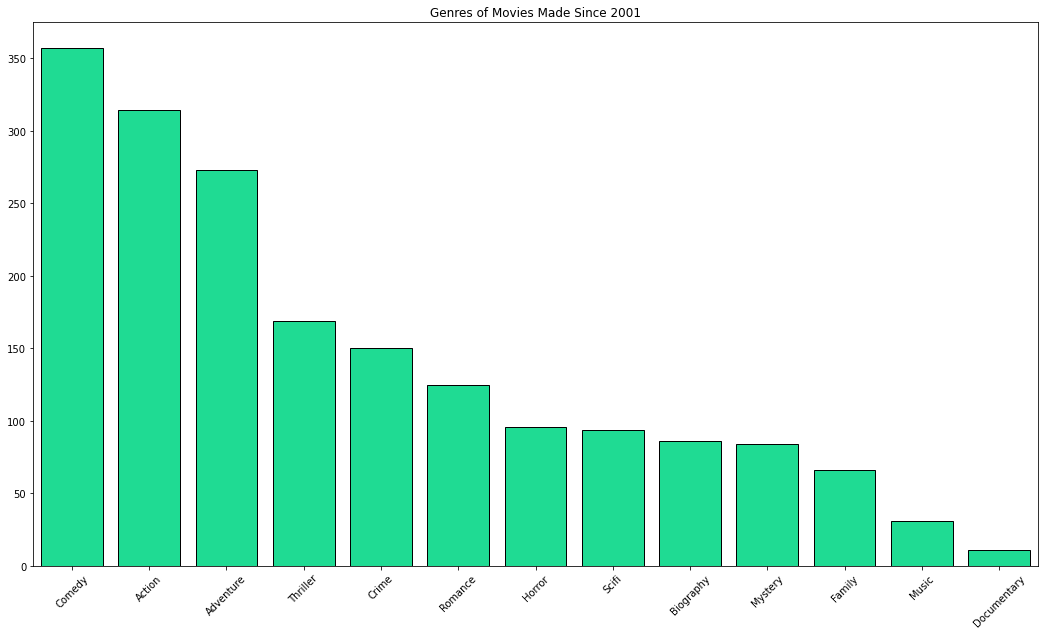

In [19]:
#First graph to show how many movies are made in each genre
fig, ax = plt.subplots(figsize=(18, 10))
sns.barplot(x=Genres_i, y=Genres, edgecolor='black', linewidth=1, color='mediumspringgreen')
ax.tick_params(axis='x', rotation=45)
ax.set_title("Genres of Movies Made Since 2001");

<ipython-input-20-df1f739c67c3>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels)
<ipython-input-20-df1f739c67c3>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels1)


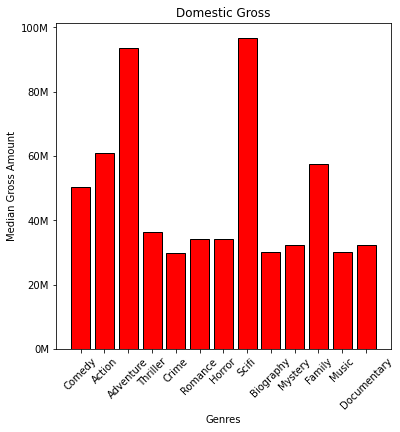

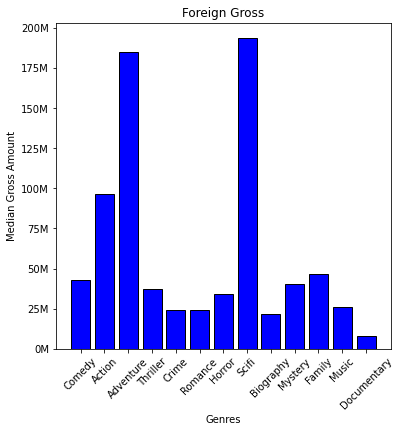

In [20]:
#Graph out the domestic gross for each genre. 
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x=Genres_i, height=DomGrossMed,  color='Red', edgecolor='black')
ax.tick_params(axis='x', rotation=45);
ylabels = ['0M', '20M', '40M', '60M', '80M', '100M']
ax.set_yticklabels(labels=ylabels)
ax.set_title('Domestic Gross')
ax.set_ylabel('Median Gross Amount')
ax.set_xlabel('Genres');

#Graph out the foreign gross for each genre. 
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x=Genres_i, height=ForGrossMed,  color='Blue', edgecolor='black')
ax.tick_params(axis='x', rotation=45, )
ylabels1 = ['0M', '25M', '50M', '75M', '100M', '125M', '150M', '175M', '200M']
ax.set_yticklabels(labels=ylabels1)
ax.set_title('Foreign Gross')
ax.set_ylabel('Median Gross Amount')
ax.set_xlabel('Genres');

<ipython-input-21-5ea757cb1da1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabelsw)


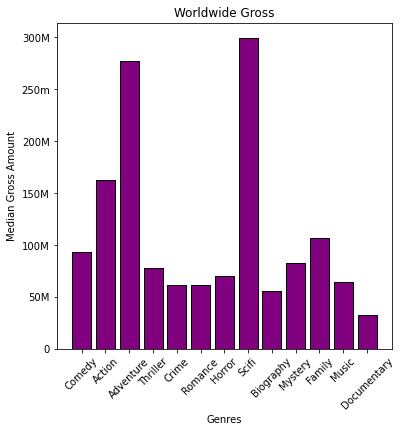

In [21]:
#Graph out the wolrdwide gross for each genre. 
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x=Genres_i, height=WorldGrossMed,  color='Purple', edgecolor='black', linewidth=1)
ylabelsw = ['0', '50M', '100M', '150M', '200M', '250m', '300M'] 
ax.set_yticklabels(labels=ylabelsw)
ax.tick_params(axis='x', rotation=45);
ax.set_title('Worldwide Gross')
ax.set_ylabel('Median Gross Amount')
ax.set_xlabel('Genres');

In [22]:
# Next, we look to see if seasonality plays a role in the movie industry.
# In order to model this data, we had to first create new columns to represent the different months within a year.
# We then iterated through our old dataset and populated our new 'months_df' dataset to find the frequency.

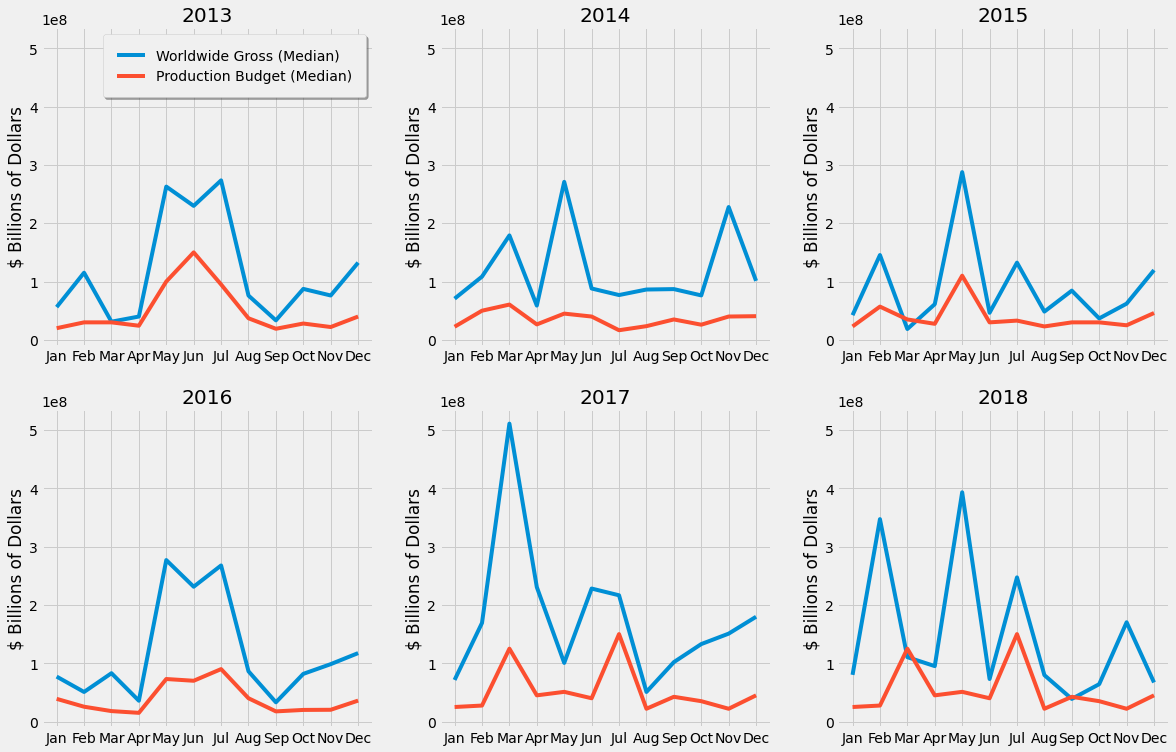

In [23]:
# Initialize 6 figures in one plot
# Set x to 'months' that we initialized above
# Plot each year
# Make them all share the same Y-axis
# Create a Legend for ease of reading

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(2, 3, figsize = (18, 12))
x= months

ax[0,0].plot(x, median_gross2013, label = 'Worldwide Gross (Median)')
ax[0,0].plot(x, median_produc2013, label = 'Production Budget (Median)')
ax[0,0].set_title('2013')
ax[0,0].set_ylabel('$ Billions of Dollars')
ax[0,0].sharey(ax[1, 2])

ax[0,1].plot(x, median_gross2014)
ax[0,1].plot(x, median_produc2014)
ax[0,1].set_title('2014')
ax[0,1].set_ylabel('$ Billions of Dollars')
ax[0,1].sharey(ax[1, 2])

ax[0,2].plot(x, median_gross2015)
ax[0,2].plot(x, median_produc2015)
ax[0,2].set_title('2015')
ax[0,2].set_ylabel('$ Billions of Dollars')
ax[0,2].sharey(ax[1, 2])

ax[1,0].plot(x, median_gross2016)
ax[1,0].plot(x, median_produc2016)
ax[1,0].set_title('2016')
ax[1,0].set_ylabel('$ Billions of Dollars')
ax[1,0].sharey(ax[1, 2])

ax[1,1].plot(x, median_gross2017)
ax[1,1].plot(x, median_produc2017)
ax[1,1].set_title('2017')
ax[1,1].set_ylabel('$ Billions of Dollars')
ax[1,1].sharey(ax[1, 2])

ax[1,2].plot(x, median_gross2018, label = 'Worldwide Gross')
ax[1,2].plot(x, median_produc2017, label = 'Production Budget')
ax[1,2].set_title('2018')
ax[1,2].set_ylabel('$ Billions of Dollars');

ax[0,0].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1);

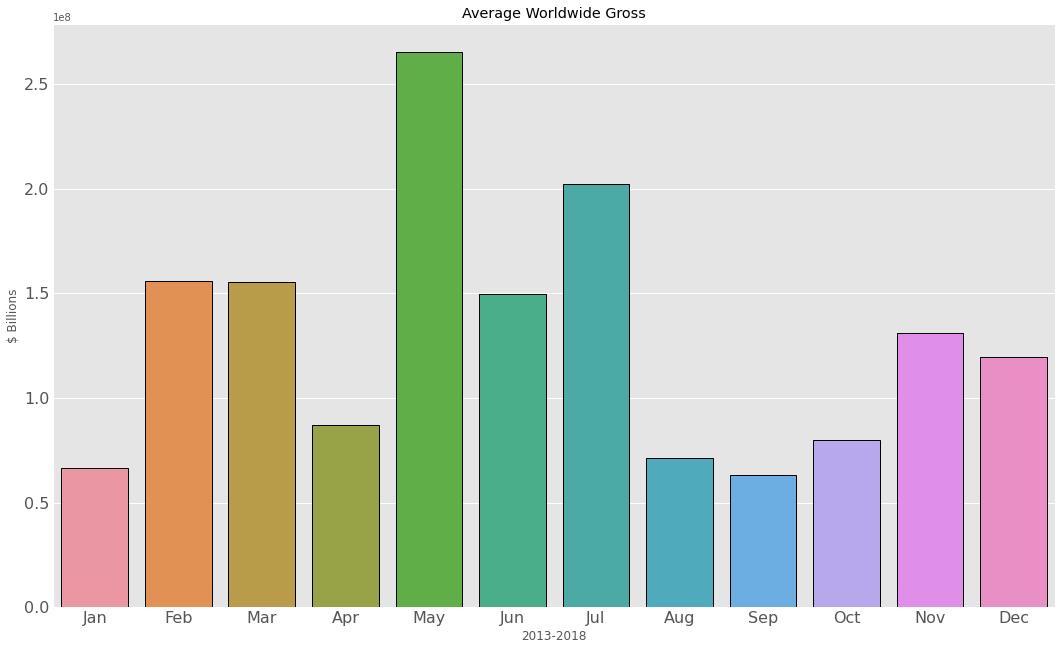

In [29]:
# Plot the average of the past 6 years
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (16, 10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
x = months
y = average_gross
sns.barplot(x=x, y=y, edgecolor = 'black', linewidth=1)
ax.set_title('Average Worldwide Gross')
ax.set_xlabel('2013-2018')
ax.set_ylabel('$ Billions');

In [25]:
# Create a months dataframe to filter results per month
column_names = months
a = np.zeros(shape=(1,12), dtype = int)
df_months = pd.DataFrame(a, columns = column_names)

# Declare new dataframe and order it as in the calender
df_months_values = BigFrame
df_months_values['month'] = pd.Categorical(df_months_values['month'], categories=months, ordered=True)
df_months_values = df_months_values['month'].sort_values()
df_months_values = list(df_months_values)

# Count the frequency of each month
for x in BigFrame['month']:
    if x in column_names:
        df_months[x] += 1
        
# Get the values from this function and copy them below *here*
list(df_months.value_counts().index)

[(69, 61, 81, 65, 68, 82, 82, 76, 83, 92, 106, 102)]

In [26]:
# Initialize y for graph
#y = [*here*]
y = [69, 61, 81, 65, 68, 82, 82, 76, 83, 92, 106, 102]

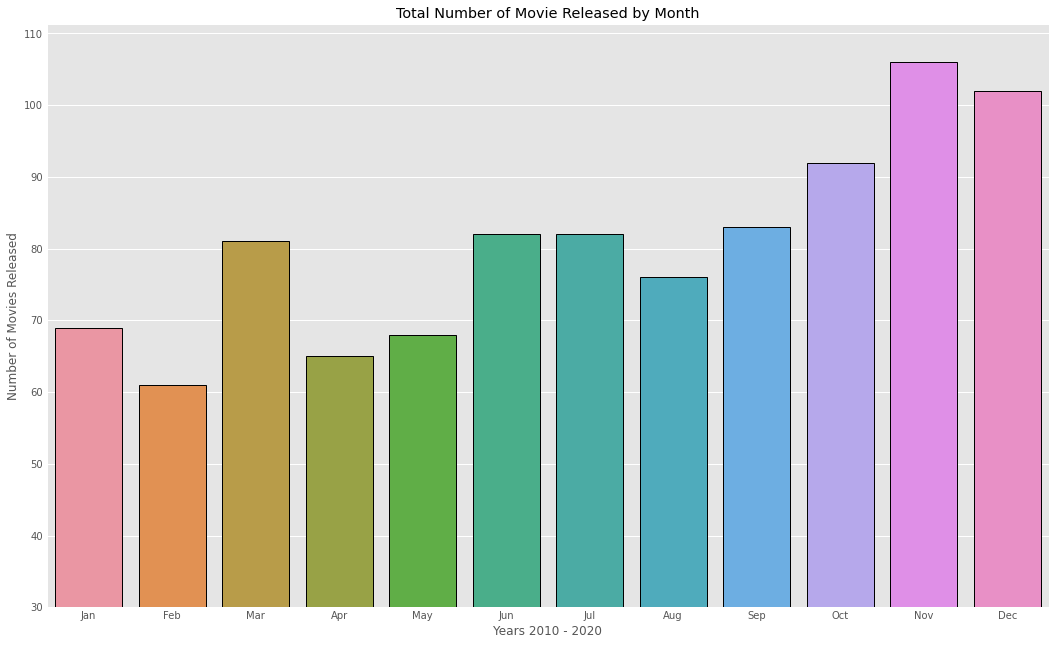

In [27]:
# Back to working with master dataframe 'BigFrame'
# Plot the total number of movies released each month
# Set y = 20 so graph is better represented
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (16, 10))
x = months
sns.barplot(x=x, y=y, edgecolor = 'black', linewidth=1);
ax.set_ylim(bottom=30)
ax.set_title('Total Number of Movie Released by Month')
ax.set_xlabel('Years 2010 - 2020')
ax.set_ylabel('Number of Movies Released');

In [28]:
# The window with the least competition is in the first half of the year (Jan-Jun)
# This distribution shows that movie production companies release more movies later in the year.
# Because of the data showing that movies do well during the summer, namely May-Jul, we can conclude that
# the best time to release our blockbuster movie is in May.

***
*Now we plot the charts comparing genres to how much gross each has

## Evaluation

* Releasing our film during May is ideal. History has shown that May returns the greatest revenue income for large production movies. With other movie competition not being so high in the beginning half of the year, May presents itself as the most ideal opportunity to debut our blockbuster film. 
* Genres 'Adventure' and 'Sci-fi' returns the highest median gross for movies within our dataset. 'Family' does well domestically, but not too well internationally. 'Action' is also a consistent genre that performs better than average.
* Not many production companies are creating Sci-fi films even though they are in high demand. This creates the perfect opportunity for our team.




***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Any skepticism in our data or how we could further explore our dataset (more potentially relevant comparisons)

Sample was 967 movies, ideally we would want that number to be larger.

Go further in depth about how much Sci-Fi and Adventure movies are spending (production_budget) in order to get good returns as shown in Visual 1.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***